In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
!ls

CITATION.cff	    Makefile	       conftest.py  notebooks	    templates
CODE_OF_CONDUCT.md  README.md	       docker	    pyproject.toml  tests
CONTRIBUTING.md     README_es.md       docs	    scripts	    utils
ISSUES.md	    README_ko.md       examples     setup.cfg
LICENSE		    README_zh-hans.md  hubconf.py   setup.py
MANIFEST.in	    README_zh-hant.md  model_cards  src


In [4]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"Total datasets: {len(all_datasets)}")
print(f"First 10 datasets: {all_datasets[:10]}")

Total datasets: 11770
First 10 datasets: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [5]:
from datasets import load_dataset

emotions_ds = load_dataset("emotion")

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
emotions_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_set = emotions_ds["train"]
train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
len(train_set)

16000

In [10]:
train_set[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [11]:
train_set.column_names

['text', 'label']

In [12]:
train_set.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [13]:
train_set[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [14]:
train_set["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [15]:
import pandas as pd

emotions_ds.set_format(type="pandas")
df = emotions_ds["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
def label_int_to_str(row):
    return emotions_ds["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int_to_str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


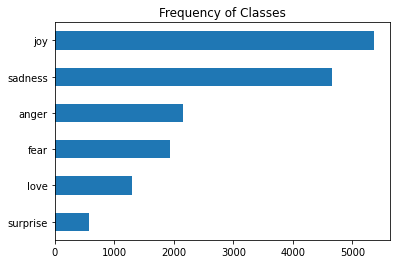

In [17]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

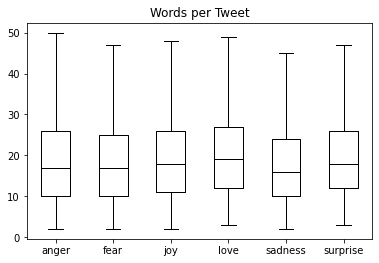

In [19]:
df["Words per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
emotions_ds.reset_format()